# Introduction to the 1d Lattice models in QuTiP

Saumya Biswas (saumyab@uoregon.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

### Module

We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module.

![title](images/latt_1.png)

### Introduction to Second Quantized notation

We are interested in the static and dynamic properties of 1d lattices. A 1d lattice can be conveniently represented by a second quantized Hamiltonian. 

\begin{eqnarray}
H = \sum_i \psi_i^{\dagger} D \psi_i + \sum_{i} \left( \psi_i^{\dagger} T \psi_{i+1} +  \psi_{i+1}^{\dagger} T^{\dagger} \psi_i  \right) \label{eq:TB_block} 
\end{eqnarray}

An 1d lattice is constituted by a repition of a unit cell a finite number of times along a direction x.

where $\psi_i$ is the annihilation operator for a unit cell at coordinate i,$D$ is the cell Hamltonian of the unit cell, $T$ is the inter cell hopping. Any 1d lattice can be put in the form of the equation above by resolving it into unit cells with nearest neighbor coupling only.


The Lattice1d class operates based on this unit cell and nearest neighbor interaction format. A unit cell can be comprised one or more sites with one or more orbitals, spins, excitations or any other degrees of freedom. A 1d lattice with next nearest neighbor coupling can be equivalently represented as a 1d lattice with a unit cell of two sites keeping the hopping interaction to nearest neighbors only.

### Declaration

In [1]:
from qutip import *
from matplotlib.pyplot import *
import numpy as np

#### Declaring a tight binding chain with a single site unit cell
As a default the instance of Lattice1d class is initialized a atomic chain with a unit
cell with one atom only. The user need only define the number of cells and the boundary
condition.

The defined Lattice1d instance can always be visualized with display_lattice()
and display_unit_cell() functions.

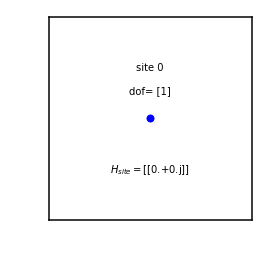

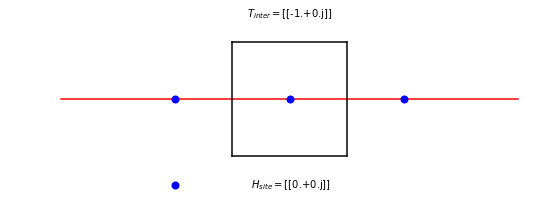

In [2]:
boundary_condition = "periodic"
cells = 3
Periodic_Atom_Chain = Lattice1d(num_cell=cells, boundary = boundary_condition)
Periodic_Atom_Chain.display_unit_cell(print_info = True)
Periodic_Atom_Chain.display_lattice(print_info = True)

Alternatively, the user can call Periodic_Atom_Chain to print all its information.

In [3]:
Periodic_Atom_Chain

Lattice1d object: Number of cells = 3,
Number of sites in the cell = 1,
Degrees of freedom per site = [1],
Lattice tensor configuration = [3, 1, 1],
basis_Hamiltonian = Quantum object: dims = [[1, 1], [1, 1]], shape = (1, 1), type = bra
Qobj data =
[[0.]],
inter_hop = [Quantum object: dims = [[1, 1], [1, 1]], shape = (1, 1), type = bra
Qobj data =
[[-1.]]],
inter_hop = [1, 1], isherm = [1, 1]
Boundary Condition:  Periodic

To define a lattice with more than one site per unit cell and one or more degrees of freedom per site, the cell_num_site and cell_site_dof arguments must be used. In a case like this, specifying the intra and inter cell interactions would also be necessary (through the arguments cell_Hamiltonian and inter_hop) in most cases. However, Lattice1d() will initiate the instance with default cell_Hamiltonian and inter_hop
if the user does not input it.

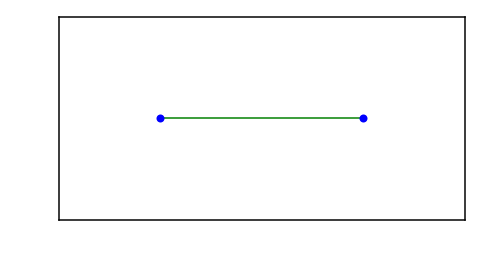

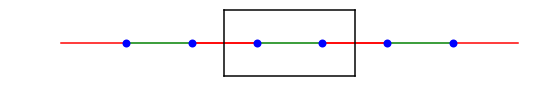

In [4]:
boundary_condition = "periodic"
cells = 3
cell_num_site = 2
cell_site_dof = [2,3]    # It could be 2 orbitals and 3 spins per sites or
                         # any other combination of such degrees of freedom
lattice_3223 = Lattice1d(num_cell=cells, boundary = boundary_condition, \
                           cell_num_site = cell_num_site, cell_site_dof = cell_site_dof)
lattice_3223.display_unit_cell(print_info = False)
lattice_3223.display_lattice(print_info = False)

There is an aide function that help the user form the cell_Hamiltonian and inter_hop
arguments namely cell_structures().

In [5]:
val_s = ['site0','site1']
val_t = [' orb0',' orb1']
val_u = [' ex0',' ex1',' ex2']
(cell_H_form,inter_cell_T_form,cell_H,inter_cell_T) = \
                        cell_structures( val_s, val_t, val_u)

The cell_structure() function returns two list of lists cell_H_form and inter_cell_T_form
that prints str s that can guide the user enter the nonzero elements at cell_H 
and inter_cell_T which are np.zeros with the appropriate size. The procedure would
be to check a certain element in cell_H_form and insert the value for cell_H and so on.

In [6]:
cell_H_form[4][8]

'<site0 orb1 ex1 H site1 orb0 ex2>'

In [7]:
cell_H[4][8] = -1-0.5j   # Calculated value from hand calculation
cell_H[8][4] = -1+0.5j

The user would have to enter all the nonzero elements in cell_H and inter_cell_T
and then convert them into Qobjs and use them in declaring the instance of Lattice_1d.

In [8]:
cell_H = Qobj(cell_H)
inter_cell_T = Qobj(inter_cell_T)
lattice_4223 = Lattice1d(num_cell=4, boundary = "periodic", cell_num_site = 2, cell_site_dof = [2,3], cell_Hamiltonian = cell_H, inter_hop = inter_cell_T )

### Position Operator

Calling the position operator, x() returns an operator in matrix form that gives the
cell number for all the dofs present on the diagonal elements. The length of the unit
cell is always considered 1.

In [9]:
lattice_412 = Lattice1d(num_cell=4, boundary = "periodic", cell_num_site = 1, cell_site_dof = [2])
lattice_412.x()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3.]]

### Distribute A Operator
The operator_at_cells() function distributes a user input operator on cells specified 
in a list and identity operator on the rest.
The operator distribute_operator() distributes it over all the cells indiscriinately.

In [10]:
lattice_412 = Lattice1d(num_cell=4, boundary = "periodic", cell_num_site = 1, cell_site_dof = [2])
op = Qobj(np.array([[0,1],[1,0]]) )
op_sp = lattice_412.operator_at_cells(op, cells = [1,2])
op_all = lattice_412.distribute_operator(op)
print(op_sp)
print(op_all)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


### basis fucntion: ket vector initialized at specific cell,site,dof:

The basis() function enables the user to initialize a ket vector at a specific cell,
site and dof.

In [11]:
lattice_3224 = Lattice1d(num_cell=3, boundary = "periodic", \
                           cell_num_site = 2, cell_site_dof = [2,4])
psi0 = lattice_3224.basis(1,0,[1,2])
print( psi0.dag() )  # Because plotting the dag() takes up less space

Quantum object: dims = [[1, 1, 1, 1], [3, 2, 2, 4]], shape = (1, 48), type = bra
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Hamiltonian:
The Hamiltoian() function returns the Hamiltonian for the lattice.


In [12]:
boundary_condition = "periodic"
cells = 8
Periodic_Atom_Chain = Lattice1d(num_cell=cells, boundary = boundary_condition)
Hamt = Periodic_Atom_Chain.Hamiltonian()
print(Hamt)

Quantum object: dims = [[8, 1, 1], [8, 1, 1]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.]
 [-1.  0.  0.  0.  0.  0. -1.  0.]]


### Dispersion Relation:
plot_dispersion() plots the valid (same as the number of unit cells) points in k-space
over the dispersion relation of an infinite crystal.

get_dispersion() returns the tuple of two np.ndarrays (knxA,val_kns). knxA has the valid k-values in it and val_kns has the band energies at those k-values. The length of 
the unit cell is always set to 1.

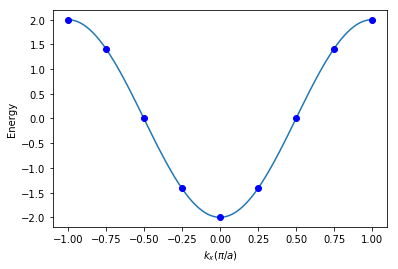

[[-3.14159265 -2.35619449 -1.57079633 -0.78539816  0.          0.78539816
   1.57079633  2.35619449]]
[[ 2.          1.41421356  0.         -1.41421356 -2.         -1.41421356
   0.          1.41421356]]


In [13]:
Periodic_Atom_Chain.plot_dispersion()
[knxA,val_kns] = Periodic_Atom_Chain.get_dispersion()
print(knxA)
print(val_kns)

### References
[1] J. R. Johansson, P. D. Nation, and F. Nori, Comp. Phys. Comm. 183, 1760 (2012). http://qutip.org



In [14]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.4.0.dev0+ce05217
Numpy Version:      1.15.2
Scipy Version:      1.1.0
Cython Version:     0.28.5
Matplotlib Version: 3.0.0
Python Version:     3.5.4
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/GSOC/Jun14/qutipOasis/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


In [15]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
